A Credit Card Dataset for Machine Learning!
Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some Machine learning techique to construct your label. Also, unbalance data problem is a big problem in this task.

In [916]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for pairplot

In [917]:
app=pd.read_csv(r"E:\Imarticus\capstone_project_1\dataset\application_record.csv")
cre=pd.read_csv(r"E:\Imarticus\capstone_project_1\dataset\credit_record.csv")
# There are two datasets, app contains personal information of the applicants with unique ID for each applicant
# The cre contains the historical transaction information of the applicants, on the basis of this transaction we are going to 
# classify them as GOOD CUSTOMER OR BAD CUSTOMER.

In [918]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [919]:
cre.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [920]:
app.shape

(438557, 18)

In [1064]:
cre.head()

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
5,5001712,-1,0


In [922]:
cre.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [923]:
cre.shape

(1048575, 3)

In [924]:
# deleting observations for the month in which there were no transaction because these observation do not have desired information
cre.drop(cre[cre['STATUS']=='X'].index,axis=0,inplace=True)

In [925]:
cre.STATUS.value_counts(normalize=True)*100

C    52.663803
0    45.645116
1     1.321268
5     0.201705
2     0.103414
3     0.038125
4     0.026568
Name: STATUS, dtype: float64

In [926]:
cre.shape

(839345, 3)

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [927]:
cre.STATUS.unique()


array(['0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [928]:
# categorizing people who pay debt before 60 days past due date as GOOD clients(0) and people who pay their debts 30 or more days past due date as BAD clients(1) 
cre.STATUS=cre.STATUS.map({'0':0, 'C':0, '1':0, '2':1, '3':1, '4':1, '5':1})

In [929]:
cre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839345 entries, 1 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              839345 non-null  int64
 1   MONTHS_BALANCE  839345 non-null  int64
 2   STATUS          839345 non-null  int64
dtypes: int64(3)
memory usage: 25.6 MB


In [930]:
print(cre.head())
print(cre.tail())

        ID  MONTHS_BALANCE  STATUS
1  5001711              -1       0
2  5001711              -2       0
3  5001711              -3       0
4  5001712               0       0
5  5001712              -1       0
              ID  MONTHS_BALANCE  STATUS
1048570  5150487             -25       0
1048571  5150487             -26       0
1048572  5150487             -27       0
1048573  5150487             -28       0
1048574  5150487             -29       0


In [931]:
cre.STATUS.value_counts(normalize=True)*100

0    99.630188
1     0.369812
Name: STATUS, dtype: float64

In [932]:
# Group all transaction information for each applicant such that even if the applicant have one bad transaction he will be 
# considered as BAD CUSTOMER
cre_group=cre.groupby("ID").agg(max).reset_index()

In [933]:
cre_group.STATUS.value_counts(normalize=True)*100

0    98.390794
1     1.609206
Name: STATUS, dtype: float64

In [934]:
print(cre.shape)
print(cre_group.shape)

(839345, 3)
(41449, 3)


In [935]:
cre_group.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,-1,0
1,5001712,0,0
2,5001717,0,0
3,5001718,0,0
4,5001719,0,0


# Merging the two DataFrames

In [936]:
df=pd.merge(app,cre_group,on="ID")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0,0
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0,0


In [937]:
# Just creating a copy of the original data for future reference
df1=pd.DataFrame
df1=df

# FEATURE SELECTION

In [938]:
df.shape

(33110, 20)

In [939]:
df.shape

(33110, 20)

In [940]:
df.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        10373
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [941]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 5601
Core staff               3250
Sales staff              3156
Managers                 2695
Drivers                  1934
High skill tech staff    1269
Medicine staff           1124
Accountants              1106
Cooking staff             587
Security staff            547
Cleaning staff            511
Private service staff     293
Waiters/barmen staff      163
Low-skill Laborers        159
Secretaries               142
HR staff                   76
Realty agents              67
IT staff                   57
Name: OCCUPATION_TYPE, dtype: int64

In [942]:
# Since almost 30% values of OCCUPATION_TYPE is missing we should not impute it because imputing may cause bias in data
# so droping the coloumn OCCUPATION_TYPE

In [943]:
df.drop("OCCUPATION_TYPE",axis=1,inplace=True)
df.shape

(33110, 19)

In [944]:
# The variable "MONTHS_BALANCE" was significant before grouping the data, now it has no significance 
# so droping "MONTHS_BALANCE"

In [945]:
df.drop("MONTHS_BALANCE",axis=1,inplace=True)
df.shape

(33110, 18)

In [946]:
for i in df.columns:
    print("Value counts for ",i," :")
    print(df[i].value_counts())

Value counts for  ID  :
5048319    1
5041559    1
5090655    1
5068128    1
5139815    1
          ..
5067487    1
5024480    1
5022433    1
5028578    1
5048321    1
Name: ID, Length: 33110, dtype: int64
Value counts for  CODE_GENDER  :
F    22220
M    10890
Name: CODE_GENDER, dtype: int64
Value counts for  FLAG_OWN_CAR  :
N    20618
Y    12492
Name: FLAG_OWN_CAR, dtype: int64
Value counts for  FLAG_OWN_REALTY  :
Y    22288
N    10822
Name: FLAG_OWN_REALTY, dtype: int64
Value counts for  CNT_CHILDREN  :
0     22959
1      6731
2      2967
3       380
4        52
5        15
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64
Value counts for  AMT_INCOME_TOTAL  :
135000.0    3891
180000.0    2826
157500.0    2778
112500.0    2722
225000.0    2669
            ... 
531000.0       1
661500.0       1
227250.0       1
145350.0       1
204750.0       1
Name: AMT_INCOME_TOTAL, Length: 258, dtype: int64
Value counts for  NAME_INCOME_TYPE  :
Working                 17077
Commer

In [947]:
# The variable FLAG_MOBIL only contains one unique value so its of no significance to the model
# Also the variable FLAG_EMAIL only gives information about if there is a email present or not so it is also of no 
# significance to the model
#  So droping FLAG_MOBIL and FLAG_EMAIL

In [948]:
df.drop("FLAG_MOBIL",axis=1,inplace=True)
df.drop("FLAG_EMAIL",axis=1,inplace=True)
df.shape

(33110, 16)

In [949]:
# The variables FLAG_WORK_PHONE and FLAG_PHONE only gives information about, is there a work phone and is there a phone present
# So these two variables also dont seem to be of any significance, we will check there significance using feature_importances_()
# in Decission Tree model

In [950]:
# Converting 'DAYS_BIRTH' values from number of days to Years and changing its name to 'AGE'
df['DAYS_BIRTH'] = round(df['DAYS_BIRTH']/-365,0)
df.rename(columns={'DAYS_BIRTH':'AGE'}, inplace=True)

In [951]:
df.AGE

0        33.0
1        33.0
2        59.0
3        52.0
4        52.0
         ... 
33105    30.0
33106    30.0
33107    30.0
33108    30.0
33109    53.0
Name: AGE, Length: 33110, dtype: float64

In [952]:
# While viewing the value_counts we noticed that in DAYS_EMPLOYED there are some values which are positive which means the
# person is unemployed, so first we will convert the positive values to 0 days and then we will convert number of days into 
# number of years

In [953]:
# Checking unique positive values
df[df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [954]:
# there is only one unique positive value, replacing it with 0

In [955]:
df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [956]:
# Converting 'DAYS_EMPLOYED' values from number of days to number of years and renaming the column to 'YEARS_EMPLOYED'
df['DAYS_EMPLOYED'] = round(df['DAYS_EMPLOYED']/-365,0)
df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [957]:
df.YEARS_EMPLOYED

0        12.0
1        12.0
2         3.0
3         8.0
4         8.0
         ... 
33105     5.0
33106     5.0
33107     5.0
33108     5.0
33109     6.0
Name: YEARS_EMPLOYED, Length: 33110, dtype: float64

In [958]:
# ploting the frequencies of ages of people

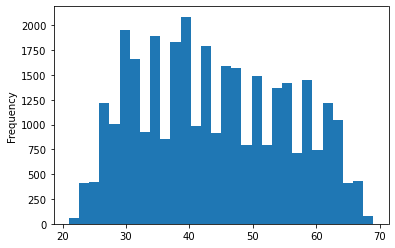

In [959]:
df['AGE'].plot(kind='hist',bins=30)

In [960]:
"""On seeing the plot we can say that most of the people applying for the credit card are aged between 30 to 40 years old"""

'On seeing the plot we can say that most of the people applying for the credit card are aged between 30 to 40 years old'

In [961]:
# ploting the frequencies of number of years of people have been employed

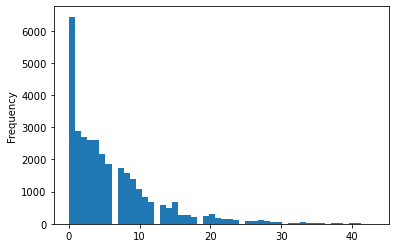

In [962]:
df['YEARS_EMPLOYED'].plot(kind='hist',bins=50)

In [963]:
"""It is obviously clear that a lot of unemployed people are applying for credit card and the number of newly employed applicants is also high"""

'It is obviously clear that a lot of unemployed people are applying for credit card and the number of newly employed applicants is also high'

Text(0, 0.5, 'Number of Customers')

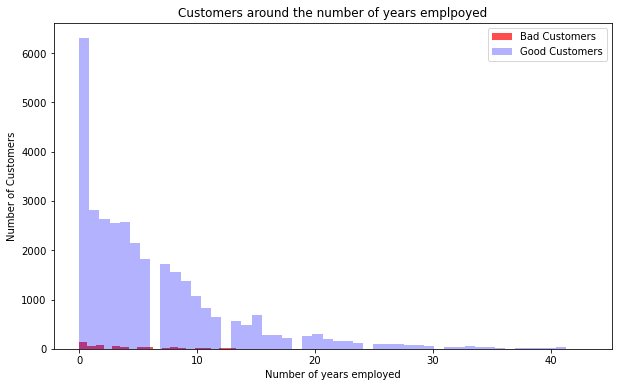

In [964]:
plt.figure(figsize=(10,6))
df[df['STATUS']==1]['YEARS_EMPLOYED'].plot(kind='hist',alpha=0.7,color='Red', bins=50,label='Bad Customers')
df[df['STATUS']==0]['YEARS_EMPLOYED'].plot(kind='hist',alpha=0.3,color='Blue', bins=50,label='Good Customers')
                                                    
plt.title('Customers around the number of years emplpoyed')                                                    
plt.legend()
plt.xlabel('Number of years employed')
plt.ylabel('Number of Customers')
# aplha value is passed for transparency

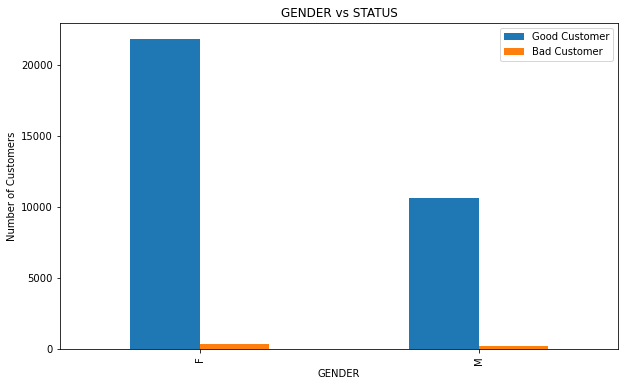

In [965]:
pd.crosstab(df.CODE_GENDER,df.STATUS).plot(kind='bar',figsize=(10,6))
plt.title('GENDER vs STATUS')
plt.xlabel('GENDER')
plt.ylabel('Number of Customers')
plt.legend(labels = ["Good Customer", "Bad Customer"])

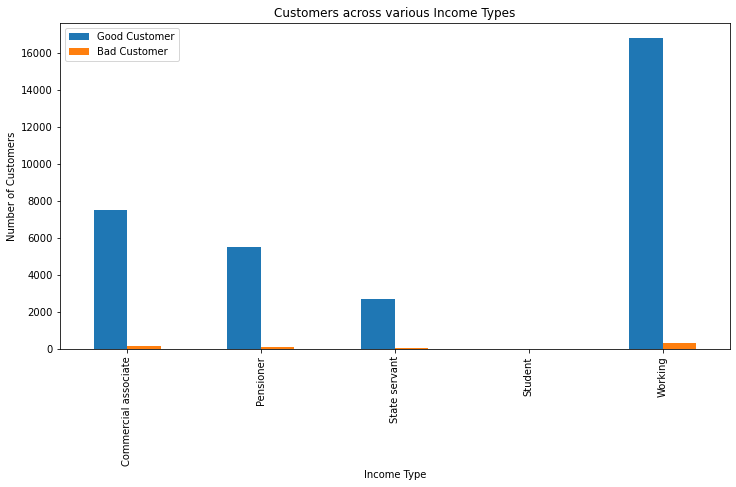

In [966]:
pd.crosstab(df.NAME_INCOME_TYPE, df.STATUS).plot(kind='bar', figsize=(12,6))
plt.title('Customers across various Income Types')
plt.xlabel('Income Type')
plt.ylabel('Number of Customers')
plt.legend(labels = ["Good Customer", "Bad Customer"])

In [967]:
# number of observations having value equals to Student in NAME_INCOME_TYPE is only 11 thats why it is showing on the graph

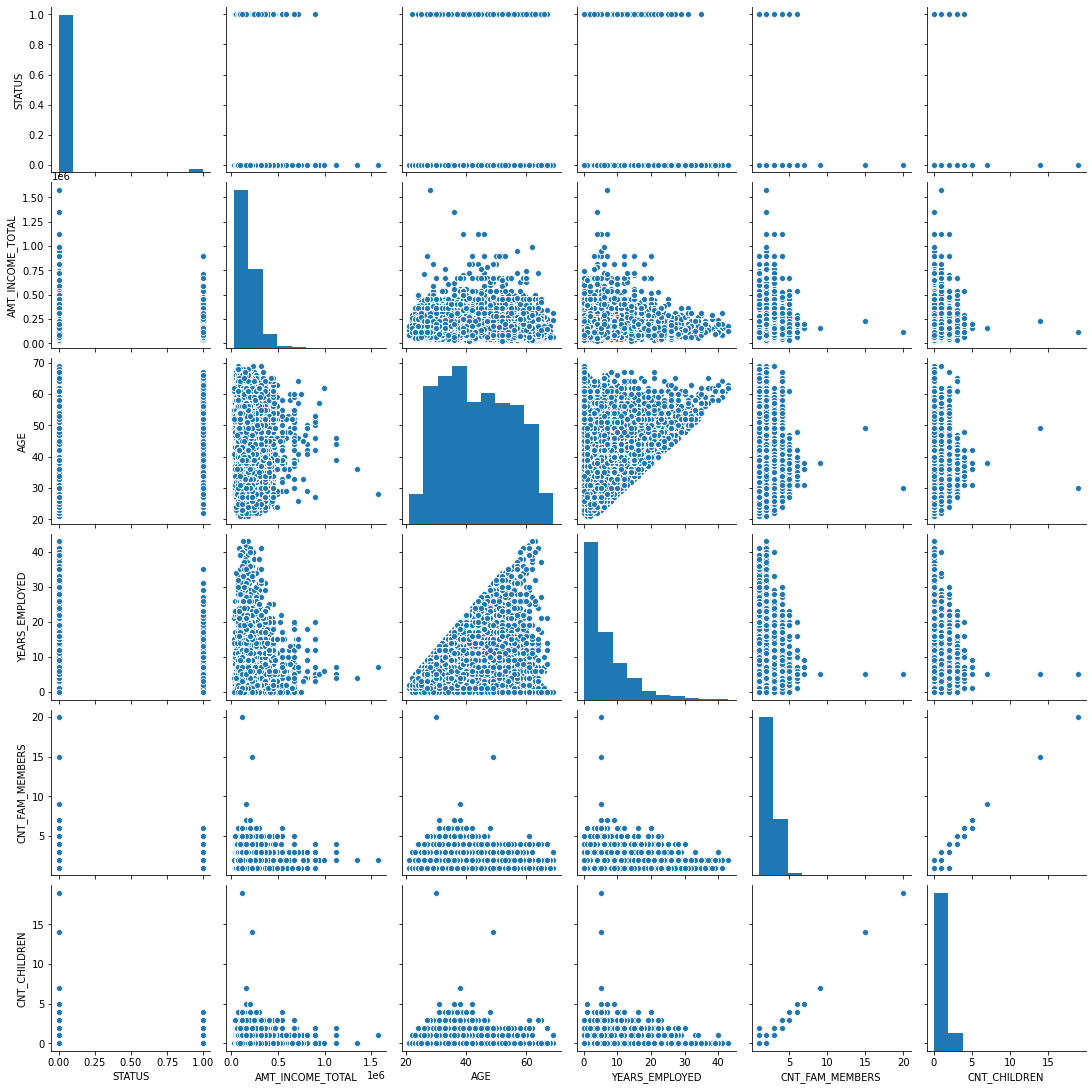

In [968]:
sns.pairplot(df[['STATUS', 'AMT_INCOME_TOTAL', 'AGE', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']])

In [969]:
# From the above pairplot we cannot see lot of relation between the variables, we can just say that number of years employed is 
# restricted by AGE which is obvious

# Generating boxplots for numerical variables

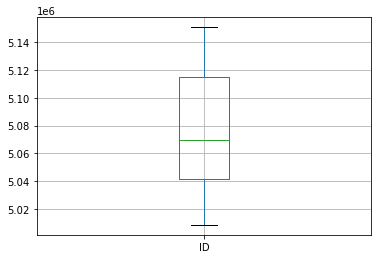

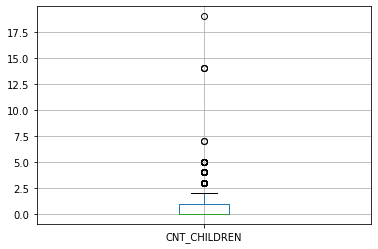

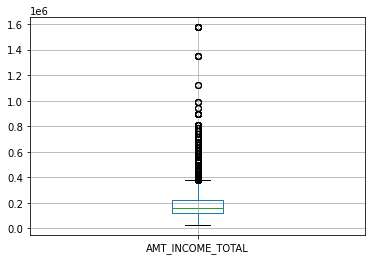

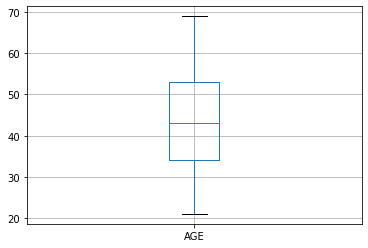

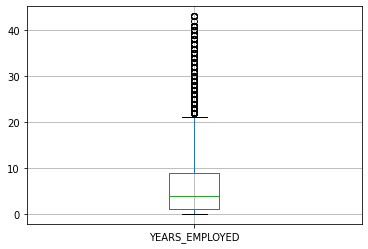

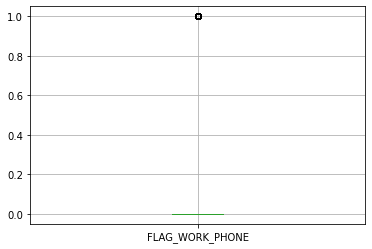

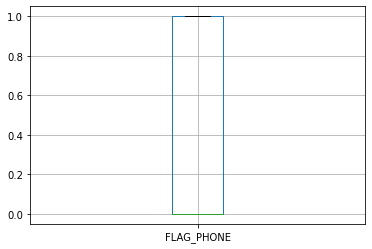

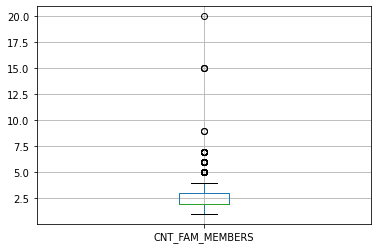

In [970]:

colname=[]
for x in df.columns[:-1]:
    if df[x].dtype=="int64" or df[x].dtype=="float64":
        colname.append(x)
 
for x in colname:
    df.boxplot(column=x)
    plt.show()

In [971]:
q1 = df['CNT_CHILDREN'].quantile(0.25) #first quartile value
q3 = df['CNT_CHILDREN'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr 


In [972]:
print(low,"\t",high,"\n",q1,"\t",q3)

-1.5 	 2.5 
 0.0 	 1.0


In [973]:
df.CNT_CHILDREN.value_counts()

0     22959
1      6731
2      2967
3       380
4        52
5        15
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [974]:
# Instead of going with the generally used criteria for outlier handling I am using different value for upper limit
# Since it is possible for a family to have 5 children so instead of going with 2.5 I am considering 5
# as the upper limit
high = 5

In [975]:
df_include = df.loc[(df['CNT_CHILDREN'] >= low) & (df['CNT_CHILDREN'] <= high)] # meeting the acceptable range
df_exclude = df.loc[(df['CNT_CHILDREN'] < low) | (df['CNT_CHILDREN'] > high)] #not meeting the acceptable range
mean=int(df_include['CNT_CHILDREN'].mean())
df_exclude['CNT_CHILDREN']=mean
#getting back the original shape of df
df=pd.concat([df_include,df_exclude],axis=0) #concatenating both dfs to get 
#the original shape
df.shape

<ipython-input-975-79bc05841dbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude['CNT_CHILDREN']=mean


(33110, 16)

In [976]:
int(df_include.CNT_CHILDREN.mean())

0

In [977]:
mean

0

In [978]:
df.CNT_CHILDREN.value_counts()

0    22965
1     6731
2     2967
3      380
4       52
5       15
Name: CNT_CHILDREN, dtype: int64

In [979]:
q1 = df['CNT_FAM_MEMBERS'].quantile(0.25) #first quartile value
q3 = df['CNT_FAM_MEMBERS'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr 
print(low,"\t",high,"\n",q1,"\t",q3)

0.5 	 4.5 
 2.0 	 3.0


Instead of going with the generally used criteria for outlier handling I am using different value for upper limit
A person can have a family of upto 10 members so instead of 4.5 using 10 as the upper limit 


In [980]:
df.CNT_FAM_MEMBERS.value_counts()

2     17759
1      6366
3      5718
4      2837
5       362
6        48
7        14
15        3
9         2
20        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [981]:
# Instead of going with the generally used criteria for outlier handling I am using different value for upper limit
# A person can have a family of upto 10 members so instead of 4.5 using 10 as the upper limit 
high=10

In [982]:
df_include = df.loc[(df['CNT_FAM_MEMBERS'] >= low) & (df['CNT_FAM_MEMBERS'] <= high)] # meeting the acceptable range
df_exclude = df.loc[(df['CNT_FAM_MEMBERS'] < low) | (df['CNT_FAM_MEMBERS'] > high)] #not meeting the acceptable range
mean=int(df_include['CNT_FAM_MEMBERS'].mean())
df_exclude['CNT_FAM_MEMBERS']=mean
#getting back the original shape of df
df=pd.concat([df_include,df_exclude],axis=0) #concatenating both dfs to get 
#the original shape
df.shape

<ipython-input-982-46b189b86a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude['CNT_FAM_MEMBERS']=mean


(33110, 16)

In [983]:
df.CNT_FAM_MEMBERS.value_counts()

2    17763
1     6366
3     5718
4     2837
5      362
6       48
7       14
9        2
Name: CNT_FAM_MEMBERS, dtype: int64

In [984]:
# Outliers in the remaining variables seem to be appropriate, so not treating them

In [985]:
# The data in variable "ID" is of no use for model building so droping "ID"
df.drop("ID",axis=1,inplace=True)

In [986]:
df.duplicated().sum()

23706

In [987]:
df.drop_duplicates(inplace=True)

In [988]:
df.shape

(9404, 15)

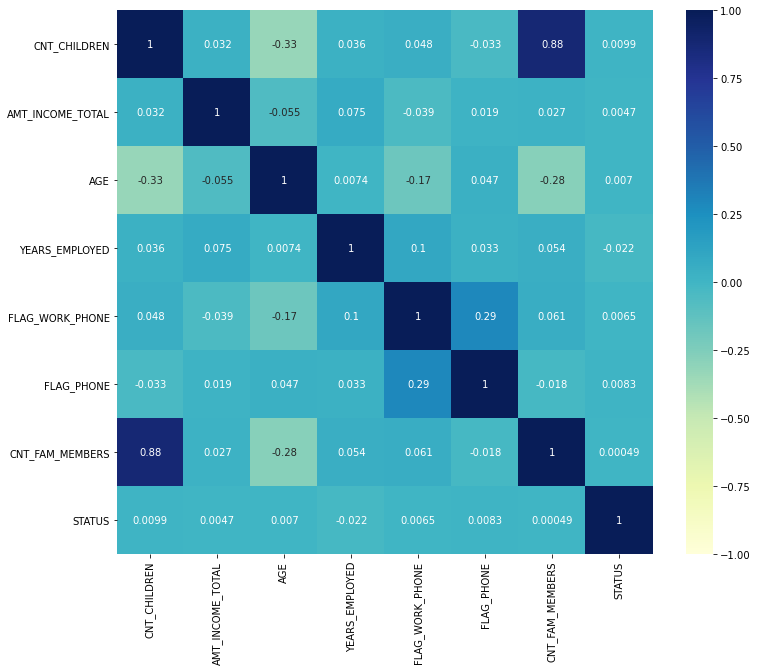

In [989]:
# Generating a heatmap for correlation matrix
plt.figure(figsize=(12,10))

corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,vmin=-1,vmax=1, cmap="YlGnBu")

In [990]:
# since there is a high correlation between "CNT_CHILDREN" and "CNT_FAM_MEMBAERS", droping "CNT_CHILDREN"

In [991]:
df.drop("CNT_CHILDREN",axis=1,inplace=True)

In [992]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,0,2,0
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,0,0,2,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,0,1,1,0
6,F,N,Y,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,-0.0,0,0,1,0
9,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,1,1,2,0


In [993]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9404 entries, 0 to 22515
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          9404 non-null   object 
 1   FLAG_OWN_CAR         9404 non-null   object 
 2   FLAG_OWN_REALTY      9404 non-null   object 
 3   AMT_INCOME_TOTAL     9404 non-null   float64
 4   NAME_INCOME_TYPE     9404 non-null   object 
 5   NAME_EDUCATION_TYPE  9404 non-null   object 
 6   NAME_FAMILY_STATUS   9404 non-null   object 
 7   NAME_HOUSING_TYPE    9404 non-null   object 
 8   AGE                  9404 non-null   float64
 9   YEARS_EMPLOYED       9404 non-null   float64
 10  FLAG_WORK_PHONE      9404 non-null   int64  
 11  FLAG_PHONE           9404 non-null   int64  
 12  CNT_FAM_MEMBERS      9404 non-null   int64  
 13  STATUS               9404 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


# Genarating Test data

In [994]:
# This will be the actual test data not the validation testing data, in industry the data scientists are given a test data on 
# which they have to predict the Target variable annd since here we were not given a seperate test data I am generationg one 
# using sample function. It is a good habit to follow industry approach
dft=df.sample(frac=0.2,random_state=10)

In [995]:
df=df.drop(dft.index)
dft.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,STATUS
22261,M,Y,Y,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,35.0,5.0,0,1,1,0
1009,M,N,Y,360000.0,Working,Secondary / secondary special,Married,House / apartment,50.0,4.0,0,0,2,0
4453,F,N,Y,360000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,34.0,11.0,0,0,4,0
12360,F,N,Y,236250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,68.0,-0.0,0,1,1,0
7202,F,N,Y,180000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,44.0,20.0,1,0,2,0


In [996]:
# droping the target variable because in real life problem target varible is not present in test data
dft.drop("STATUS",axis= 1 , inplace= True)

In [997]:
# Seperating all the categorical variables for Label Encoding
colname1=[]
for x in df.columns[:-1]:
    if df[x].dtype=="object":
        colname1.append(x)
        
colname1

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [998]:
# Converting categorical variables into numerical variables using LabelEncoder
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname1:
    df[x]=le.fit_transform(df[x])

In [999]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,STATUS
0,1,1,1,427500.0,4,1,0,4,33.0,12.0,1,0,2,0
2,1,1,1,112500.0,4,4,1,1,59.0,3.0,0,0,2,0
3,0,0,1,270000.0,0,4,3,1,52.0,8.0,0,1,1,0
6,0,0,1,283500.0,1,1,2,1,62.0,-0.0,0,0,1,0
9,1,1,1,270000.0,4,1,1,1,46.0,2.0,1,1,2,0


In [1000]:
# Seperating Independant variables and Dependant variables
X=df.values[:,:-1]
Y=df.values[:,-1]
Y=Y.astype(int)

In [1001]:
# Standardizing all Independant variables so that there will be no bias in the model due different numerical ranges
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

In [1002]:
# Spliting the data for training and validation testing
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10) 

In [1003]:
X
# we can see that X is now standardized

array([[ 1.35525902,  1.29839381,  0.70274058, ...,  1.88810148,
        -0.63937587, -0.19633948],
       [ 1.35525902,  1.29839381,  0.70274058, ..., -0.52963255,
        -0.63937587, -0.19633948],
       [-0.73786633, -0.77018235,  0.70274058, ..., -0.52963255,
         1.56402525, -1.29371091],
       ...,
       [-0.73786633, -0.77018235, -1.42300022, ...,  1.88810148,
         1.56402525,  7.48526048],
       [ 1.35525902,  1.29839381,  0.70274058, ..., -0.52963255,
        -0.63937587, -0.19633948],
       [-0.73786633, -0.77018235,  0.70274058, ...,  1.88810148,
         1.56402525, -0.19633948]])

# Building models

In [1004]:
# Building a decision tree model to check feature importances
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [1005]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1322  100]
 [  75    8]]
0.8837209302325582
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1422
           1       0.07      0.10      0.08        83

    accuracy                           0.88      1505
   macro avg       0.51      0.51      0.51      1505
weighted avg       0.90      0.88      0.89      1505



In [1006]:
"""The recall value for class 1 is very low this happening beacause of the unbalance in the data, the model does not have enough
class 1 data to learn on it properly, to solve this problem we will upsamle the class 1 data"""

'The recall value for class 1 is very low this happening beacause of the unbalance in the data, the model does not have enough\nclass 1 data to learn on it properly, to solve this problem we will upsamle the class 1 data'

# Upsampling

In [1007]:
df.STATUS.value_counts()

0    7154
1     369
Name: STATUS, dtype: int64

In [1008]:
df.STATUS.value_counts(normalize=True)*100

0    95.095042
1     4.904958
Name: STATUS, dtype: float64

In [1009]:
# We can see there is some unbalance in data so upsampling the data because model is predicting very 
# badly on class 1

In [1010]:
from sklearn.utils import resample
# seperating class 0 and class 1
df_maj=df[df.STATUS==0]
df_min=df[df.STATUS==1]

In [1011]:
df_min_up= resample(df_min,replace=True,n_samples=7154,random_state=10)

In [1012]:
df_min_up.shape

(7154, 14)

In [1013]:
df = pd.concat([df_maj,df_min_up])

In [1014]:
df.STATUS.value_counts()

1    7154
0    7154
Name: STATUS, dtype: int64

In [1015]:
# Seperating Independant variables and Dependant variables
X=df.values[:,:-1]
Y=df.values[:,-1]
Y=Y.astype(int)

In [1016]:
# Standardizing all Independant variables so that there will be no bias in the model due different numerical ranges
scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

In [1017]:
# Spliting the data for training and validation testing
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10) 

In [1018]:
X

array([[ 1.26082642,  1.31648863,  0.77315368, ...,  1.86651034,
        -0.6400431 , -0.19799995],
       [ 1.26082642,  1.31648863,  0.77315368, ..., -0.53575915,
        -0.6400431 , -0.19799995],
       [-0.79313059, -0.75959638,  0.77315368, ..., -0.53575915,
         1.56239478, -1.30075717],
       ...,
       [ 1.26082642,  1.31648863, -1.29340392, ..., -0.53575915,
         1.56239478,  0.90475727],
       [-0.79313059, -0.75959638,  0.77315368, ..., -0.53575915,
         1.56239478, -0.19799995],
       [ 1.26082642,  1.31648863,  0.77315368, ..., -0.53575915,
        -0.6400431 ,  0.90475727]])

In [1019]:
# Building a decision tree model to check feature importances

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1294  137]
 [   0 1431]]
0.9521313766596785
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1431
           1       0.91      1.00      0.95      1431

    accuracy                           0.95      2862
   macro avg       0.96      0.95      0.95      2862
weighted avg       0.96      0.95      0.95      2862



In [1020]:
# We can notice that because of upsampling the recall of class 1 has improved drastically

In [1021]:
print(list(zip(df.columns[0:-1],model_DecisionTree.feature_importances_)))

[('CODE_GENDER', 0.044284425266060155), ('FLAG_OWN_CAR', 0.04293879519496588), ('FLAG_OWN_REALTY', 0.00860976014564666), ('AMT_INCOME_TOTAL', 0.2693130307428257), ('NAME_INCOME_TYPE', 0.05519367112223771), ('NAME_EDUCATION_TYPE', 0.03737759623066809), ('NAME_FAMILY_STATUS', 0.05835882552410166), ('NAME_HOUSING_TYPE', 0.025265461221472177), ('AGE', 0.21075448697062568), ('YEARS_EMPLOYED', 0.14530146385047812), ('FLAG_WORK_PHONE', 0.021177655562568783), ('FLAG_PHONE', 0.033996687421475026), ('CNT_FAM_MEMBERS', 0.04742814074687437)]


In [1022]:
# None of the variables have very low importance value so not droping any variable

In [1023]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[826 605]
 [650 781]]
0.5614954577218728
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1431
           1       0.56      0.55      0.55      1431

    accuracy                           0.56      2862
   macro avg       0.56      0.56      0.56      2862
weighted avg       0.56      0.56      0.56      2862



In [1024]:
# We can tune the LinearRegression model but the accuracy of the basic model is very low so it is of no use to waist time in 
# tuning the model

In [1025]:
# Building a Support Vector machine model 
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 983  448]
 [ 143 1288]]
0.7935010482180294
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1431
           1       0.74      0.90      0.81      1431

    accuracy                           0.79      2862
   macro avg       0.81      0.79      0.79      2862
weighted avg       0.81      0.79      0.79      2862



In [1026]:
# I tried tuning the hyper parameters but on tuning the accuracy score went down so going with the defaul hyperparameter values

In [1027]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), 
                               metric='manhattan')


model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[856 575]
 [496 935]]
0.6257861635220126
              precision    recall  f1-score   support

           0       0.63      0.60      0.62      1431
           1       0.62      0.65      0.64      1431

    accuracy                           0.63      2862
   macro avg       0.63      0.63      0.63      2862
weighted avg       0.63      0.63      0.63      2862



In [1028]:
# The k value in above model is not the best value so to find the best k-value running a for loop below
int(np.sqrt(len(X_train)))

106

In [1029]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(2,107):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)


Accuracy is  0.9248777078965759 for K-Value: 2
Accuracy is  0.9276729559748428 for K-Value: 3
Accuracy is  0.9280223619846262 for K-Value: 4
Accuracy is  0.8983228511530398 for K-Value: 5
Accuracy is  0.8986722571628232 for K-Value: 6
Accuracy is  0.8801537386443047 for K-Value: 7
Accuracy is  0.8784067085953878 for K-Value: 8
Accuracy is  0.8581411600279525 for K-Value: 9
Accuracy is  0.8556953179594688 for K-Value: 10
Accuracy is  0.8322851153039832 for K-Value: 11
Accuracy is  0.8291404612159329 for K-Value: 12
Accuracy is  0.813067784765898 for K-Value: 13
Accuracy is  0.813067784765898 for K-Value: 14
Accuracy is  0.7980433263452131 for K-Value: 15
Accuracy is  0.7976939203354297 for K-Value: 16
Accuracy is  0.782669461914745 for K-Value: 17
Accuracy is  0.7819706498951782 for K-Value: 18
Accuracy is  0.7686932215234102 for K-Value: 19
Accuracy is  0.76659678546471 for K-Value: 20
Accuracy is  0.7543675751222921 for K-Value: 21
Accuracy is  0.7470300489168413 for K-Value: 22
Accur

In [1030]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

4 : 0.9280223619846262


In [1031]:
# The best k-value is coming out to be as 4 

In [1032]:
# Predicting using the KNeighbors_Classifier with k= 4, that is the best k-value
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=4, 
                               metric='euclidean')

model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1225  206]
 [   0 1431]]
0.9280223619846262
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1431
           1       0.87      1.00      0.93      1431

    accuracy                           0.93      2862
   macro avg       0.94      0.93      0.93      2862
weighted avg       0.94      0.93      0.93      2862



In [1033]:
# I tried KNN using euclidean, manhattan, minkowski distance metrics the best result were given by EUCLIDEAN metric

In [1034]:
#predicting using the Naive_Bayes_Classifier
from sklearn.naive_bayes import GaussianNB

model_NB=GaussianNB()

#fit the model on the data and predict the values
model_NB.fit(X_train,Y_train)
Y_pred=model_NB.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[722 709]
 [596 835]]
0.5440251572327044
              precision    recall  f1-score   support

           0       0.55      0.50      0.53      1431
           1       0.54      0.58      0.56      1431

    accuracy                           0.54      2862
   macro avg       0.54      0.54      0.54      2862
weighted avg       0.54      0.54      0.54      2862



In [1035]:
# Here also the accuracy score for the base model is low there is no need to waist time in tuning it

In [1036]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1380   51]
 [   0 1431]]
0.9821802935010482
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1431
           1       0.97      1.00      0.98      1431

    accuracy                           0.98      2862
   macro avg       0.98      0.98      0.98      2862
weighted avg       0.98      0.98      0.98      2862



In [1037]:
# I tried many values for number of estimator in the above RandomForest model but after increasing value from 200 the results
# are not changing so going with the lower value

In [1038]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)



#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1379   52]
 [   0 1431]]
0.9818308874912649
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1431
           1       0.96      1.00      0.98      1431

    accuracy                           0.98      2862
   macro avg       0.98      0.98      0.98      2862
weighted avg       0.98      0.98      0.98      2862



In [1039]:
# For the above Extratree Classifier the best result is coming when number of tree are kept 100, on both increasing as well as 
# decresing the accuracy score is droping

In [1040]:
# Running Adaboost classifier

#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=300,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)



#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1377   54]
 [   0 1431]]
0.9811320754716981
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1431
           1       0.96      1.00      0.98      1431

    accuracy                           0.98      2862
   macro avg       0.98      0.98      0.98      2862
weighted avg       0.98      0.98      0.98      2862



In [1041]:
#  On trying different values for n_estimators 300 was found to be best

In [1042]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=6000,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)


model_GradientBoosting.n_estimators


#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))



[[1297  134]
 [   0 1431]]
0.9531795946890287
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1431
           1       0.91      1.00      0.96      1431

    accuracy                           0.95      2862
   macro avg       0.96      0.95      0.95      2862
weighted avg       0.96      0.95      0.95      2862



In [1043]:
# On trying different values for n_estimators 6000 was found to be best in Gradient boosting model

In [1044]:
# Running XGBoost

from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(n_estimators=6000,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)




#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\awais\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[1358   73]
 [   0 1431]]
0.9744933612858141
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1431
           1       0.95      1.00      0.98      1431

    accuracy                           0.97      2862
   macro avg       0.98      0.97      0.97      2862
weighted avg       0.98      0.97      0.97      2862



In [1045]:
# On trying different values for n_estimators 6000 was found to be best in XGBoost model

In [1046]:
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='entropy',random_state=10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=100,gamma=0.1)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
estimators.append(('knn', model4))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)




#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1333   98]
 [  22 1409]]
0.9580712788259959
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1431
           1       0.93      0.98      0.96      1431

    accuracy                           0.96      2862
   macro avg       0.96      0.96      0.96      2862
weighted avg       0.96      0.96      0.96      2862



In [1047]:
# Even though logisticRegression but on including it in Voting classifier increased its accuracy

# Best model

We got best reulst using RandommForest model with 200 trees. So we will use that model to predict on the test data

We also need to preprocess the Test data to predict upon it

In [1048]:
colname2=[]
for x in dft.columns[:-1]:
    if dft[x].dtype=="object":
        colname2.append(x)
        
# Converting categorical variables into numerical variables using LabelEncoder
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname2:
    dft[x]=le.fit_transform(dft[x])

In [1051]:
Xt=dft.values[:,:]

In [1052]:
# Standardizing the data 
Xt= scaler.transform(Xt)

In [1053]:
Y_predt=model_RandomForest.predict(X_test)

In [1054]:
print(Y_predt)

[1 0 1 ... 1 0 0]


In [ ]:
# These are the predictated value and we can store them in a excel file and send it to the client for whom we are working
